In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pulp
import sys
import os
import importlib.util
import importlib
import gurobipy as gp

# モジュールを強制的に再ロード（古いキャッシュをクリア）
if 'code' in sys.modules:
    del sys.modules['code']
# サブモジュールも削除
for module_name in list(sys.modules.keys()):
    if module_name.startswith('code.'):
        del sys.modules[module_name]

current_dir = os.getcwd()
spec = importlib.util.spec_from_file_location("code", os.path.join(current_dir, "code", "__init__.py"))
code_module = importlib.util.module_from_spec(spec)
sys.modules["code"] = code_module
spec.loader.exec_module(code_module)

# サブモジュールも再ロード
importlib.reload(code_module)

make_tensor_grid_2d = code_module.make_tensor_grid_2d
make_tensor_grid_3d = code_module.make_tensor_grid_3d
product_beta_density = code_module.product_beta_density
solve_mechanism_single_agent = code_module.solve_mechanism_single_agent
solve_mechanism_single_agent_iterative = code_module.solve_mechanism_single_agent_iterative
plot_polyhedral_regions = code_module.plot_polyhedral_regions
save_results_single_agent = code_module.save_results_single_agent
load_results_single_agent = code_module.load_results_single_agent

print("モジュールを再ロードしました")


モジュールを再ロードしました


In [9]:
home_license = os.path.expanduser('~/gurobi.lic')
os.environ['GRB_LICENSE_FILE'] = home_license

SOLVER = pulp.GUROBI(msg=True)


# ケース1: 1人3財（シナジーなし）


In [11]:
# ケース1: 財a, 財b, 財cはBeta(1,1)
NX, NY, NZ = 10, 10, 10
BETA_PARAMS = [
    (1.0, 1.0),
    (1.0, 1.0),
    (1.0, 1.0),
]

points, weights = make_tensor_grid_3d(NX, NY, NZ, BETA_PARAMS)
print(f"#types = {len(points)}")
print(f"First point: {points[0]}, weight: {weights[0]}")


#types = 1000
First point: (0.05, 0.05, 0.05), weight: 0.001


In [12]:
status, obj_val, u_sol, p_sol, n_iter = solve_mechanism_single_agent_iterative(
    points, weights, grid_sizes=(NX, NY, NZ), solver=SOLVER
)

print("LP status:", status)
print("Optimal revenue:", obj_val)
print(f"Number of iterations: {n_iter}")

# 結果を保存
filepath_case1 = save_results_single_agent(
    points, weights, u_sol, p_sol, obj_val, status,
    grid_sizes=(NX, NY, NZ),
    n_iter=n_iter,
    filename="results_daskalakis_case1.npz"
)


Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 5400 rows, 4000 columns and 16200 nonzeros (Max)
Model fingerprint: 0x9b9ffba7
Model has 4000 linear objective coefficients
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e-05, 1e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 246 rows and 300 columns
Presolve time: 0.01s
Presolved: 5154 rows, 3700 columns, 17424 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4622500e+00   2.963250e+02   0.000000e+00      0s
    1947    9.2565000e-01   0.000000e+00   0.000000e+00      0s

Solved in 1947 iterations and 0.06 seconds (0.06 work units)
Optimal objective  9.256500000e-01
Gurobi statu

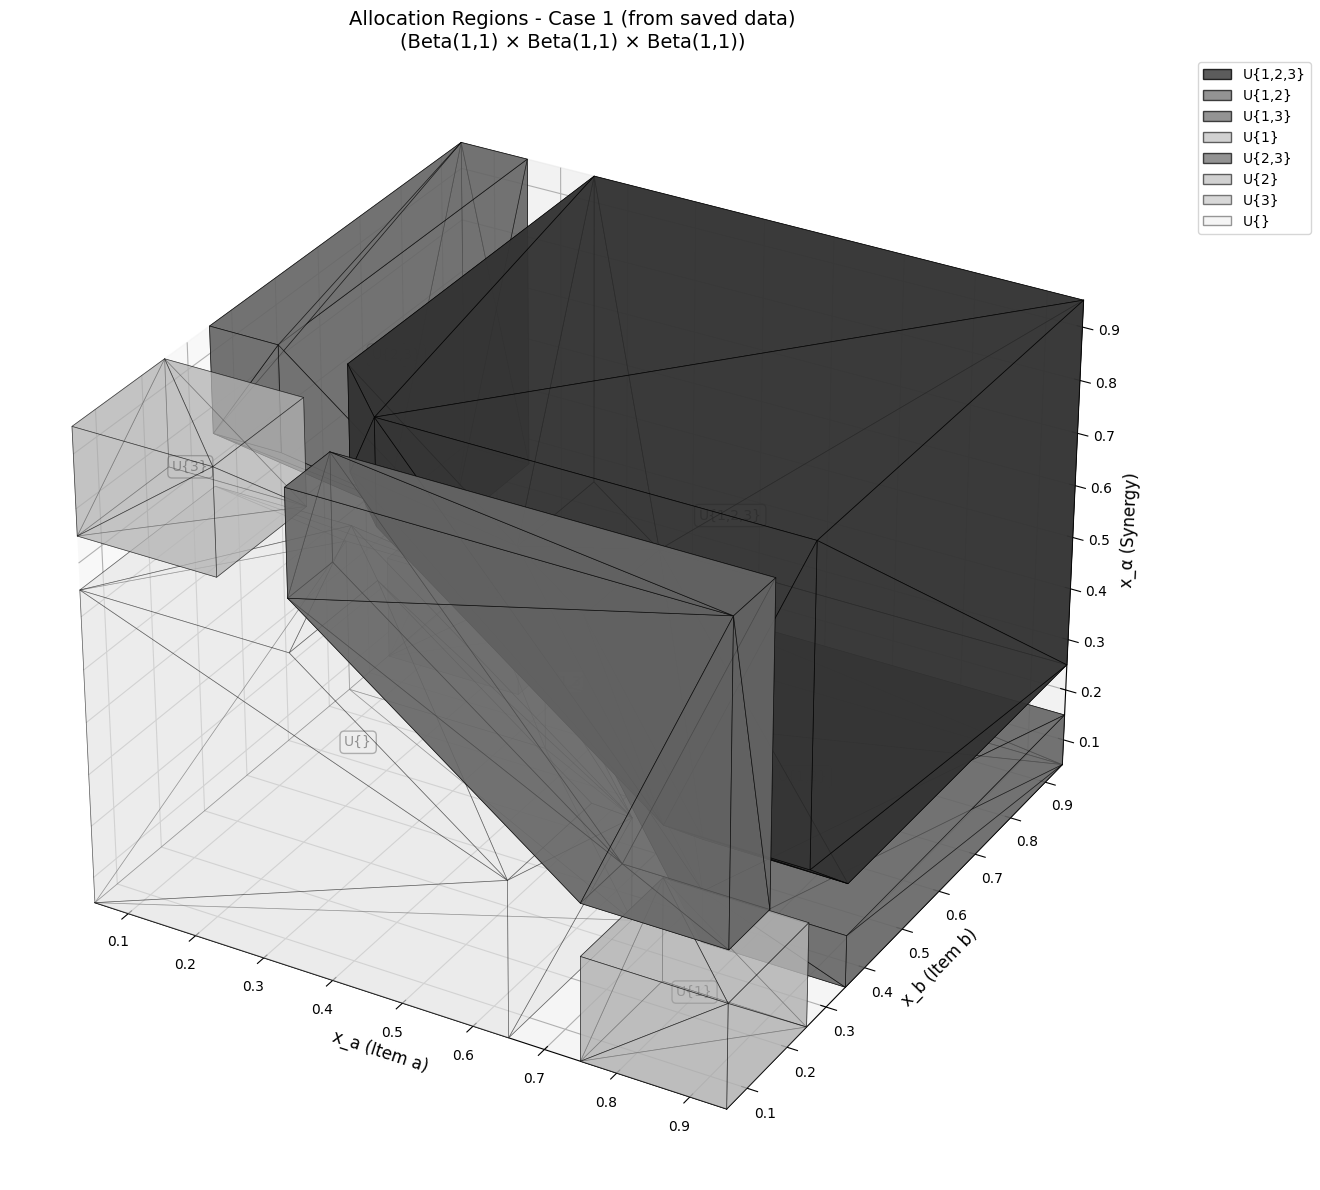

領域の統計:
  U{1,2,3}: 450 点
  U{1,2}: 78 点
  U{1,3}: 78 点
  U{1}: 27 点
  U{2,3}: 78 点
  U{2}: 27 点
  U{3}: 27 点
  U{}: 235 点


{'U{}': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  40,
  41,
  42,
  43,
  44,
  45,
  50,
  51,
  52,
  53,
  54,
  60,
  61,
  62,
  63,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  140,
  141,
  142,
  143,
  144,
  145,
  150,
  151,
  152,
  153,
  154,
  160,
  161,
  162,
  163,
  200,
  201,
  202,
  203,
  204,
  205,
  206,
  210,
  211,
  212,
  213,
  214,
  215,
  216,
  220,
  221,
  222,
  223,
  224,
  225,
  226,
  230,
  231,
  232,
  233,
  234,
  235,
  236,
  240,
  241,
  242,
  243,
  244,
  245,
  250,
  251,
  252,
  253,
  254,
  260,
  261,
  262,
  263,
  300,
  301,
  302,
  303,
  304,
  305,
  306,
  310,
  311,
  312,
  313,
  314,
  315,
  316,
  320,
  321,
  322,
  323,
  324,
  325,


In [13]:
# 保存されたデータから読み込んで可視化
data = load_results_single_agent("data/results_daskalakis_case1.npz")
plot_polyhedral_regions(
    data['points'], data['p'], data['p'][2, :],
    title="Allocation Regions - Case 1 (from saved data)\n(Beta(1,1) × Beta(1,1) × Beta(1,1))"
)
